In [15]:
from pycbc.waveform import td_approximants

# List of td approximants that are available
from pycbc.waveform import td_approximants
apprx=td_approximants()
appx=apprx[0:3]

In [16]:
detectors=['H1','L1']

In [17]:
import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.psd import interpolate, inverse_spectrum_truncation
import numpy as np

merger = Merger("GW150914")

strain={}
for det in detectors:
  straintemp = merger.strain(det)
  straintemp = highpass(straintemp,15.0)
  strain[det] =  resample_to_delta_t(straintemp,1.0/2048)
conditioned = {}
psd = {}
for det in detectors:
  conditioned[det] = strain[det].crop(2, 2)
  psdtemp = conditioned[det].psd(4)
  psdtemp = interpolate(psdtemp, conditioned[det].delta_f)
  psd[det] = inverse_spectrum_truncation(psdtemp, int(4 * conditioned[det].sample_rate),low_frequency_cutoff=15)

In [18]:
m=36
hp={}
for i in range(3):
  for det in detectors:
    hp[det,i],_= get_td_waveform(approximant=appx[i],
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned[det].delta_t,
                     f_lower=20)
    hp[det,i].resize(len(conditioned[det]))

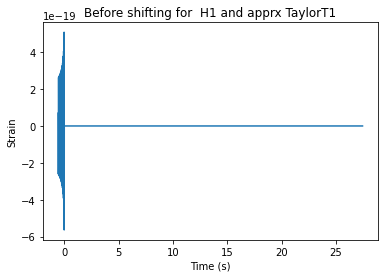

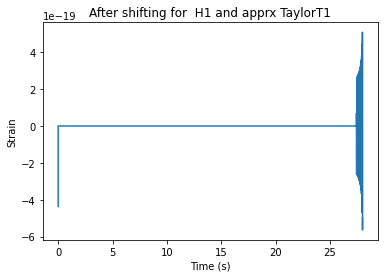

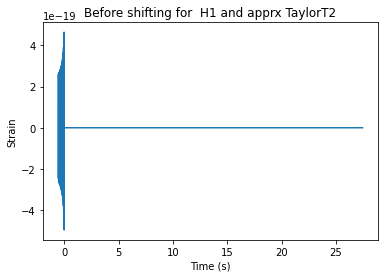

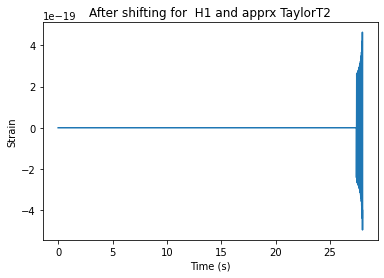

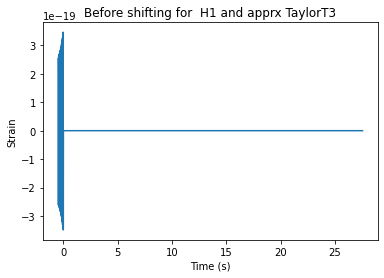

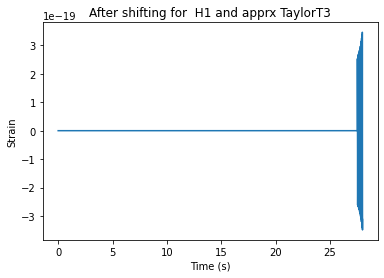

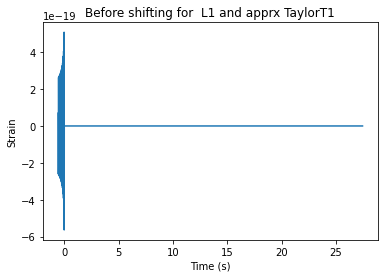

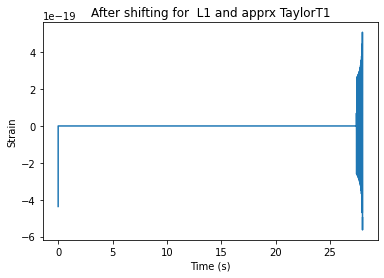

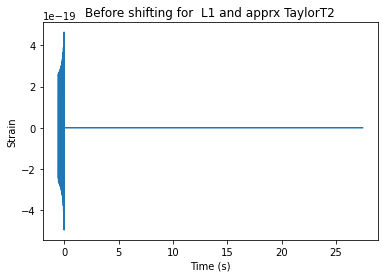

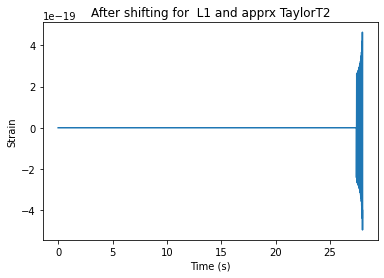

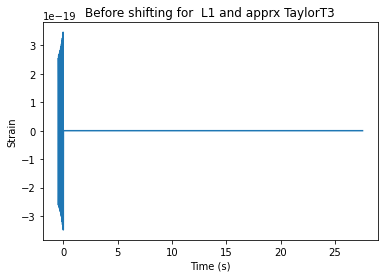

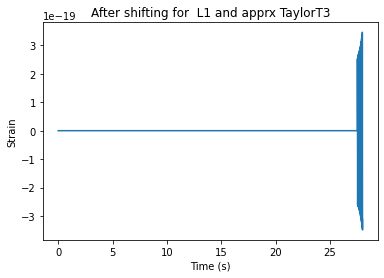

In [19]:
template={}
for det in detectors:
  for i in range(3):
    pylab.figure()
    pylab.title('Before shifting for  {} and apprx {}'.format(det,appx[i]))
    pylab.plot(hp[det,i].sample_times, hp[det,i])
    pylab.xlabel('Time (s)')
    pylab.ylabel('Strain')

    template[det,i] = hp[det,i].cyclic_time_shift(hp[det,i].start_time)

    pylab.figure()
    pylab.title('After shifting for  {} and apprx {}'.format(det,appx[i]))
    pylab.plot(template[det,i].sample_times, template[det,i])
    pylab.xlabel('Time (s)')
    pylab.ylabel('Strain')

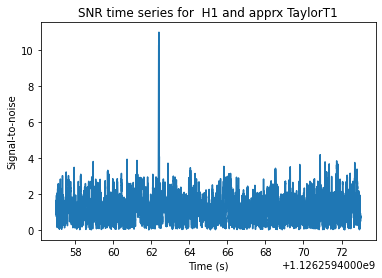

We found a signal at 1126259462.4023438s with SNR 10.998128975072158


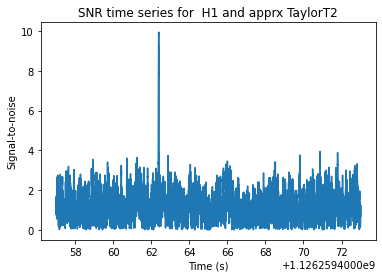

We found a signal at 1126259462.3896484s with SNR 9.936361541922224


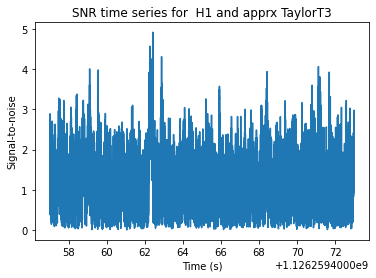

We found a signal at 1126259462.4160156s with SNR 4.918582928169803


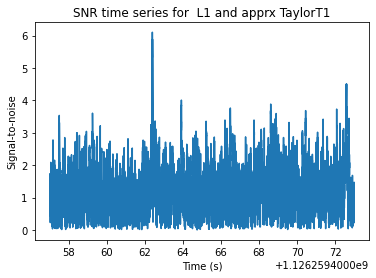

We found a signal at 1126259462.3911133s with SNR 6.102595760291294


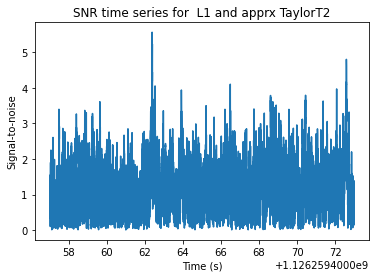

We found a signal at 1126259462.378418s with SNR 5.5578122041749065


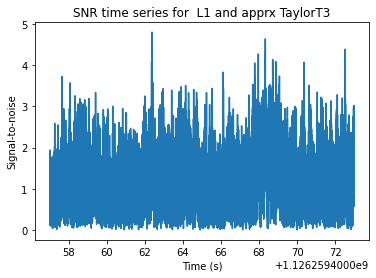

We found a signal at 1126259462.3676758s with SNR 4.792725674775924


In [20]:
from pycbc.filter import matched_filter

# Calculating the snr

snrp={}
peak={}
for det in detectors:
  for i in range(3):
    snrtemp=matched_filter(template[det,i], conditioned[det], psd=psd[det], low_frequency_cutoff=20)
    snr = snrtemp.crop(4 + 4, 4)
    pylab.figure
    pylab.plot(snr.sample_times, abs(snr))
    pylab.title('SNR time series for  {} and apprx {}'.format(det,appx[i]))
    pylab.ylabel('Signal-to-noise')
    pylab.xlabel('Time (s)')
    pylab.show()

    peak[det,i] = abs(snr).numpy().argmax()
    snrp[det,i] = snr[peak[det,i]]
    time = snr.sample_times[peak[det,i]]

    print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp[det,i])))

In [22]:
#coincidence x
from math import sqrt
rho={}
for det in detectors:
  for i in range(3):
    for j in range(3):
      rho[i,j]=(abs(snrp[det,i]**2)+abs(snrp[det,j]**2))**(0.5)

In [32]:
values=rho.values()
rho_max=max(values)
def get_key(val):
    for key, value in rho.items():
         if val == value:
             return key
    return nil

In [44]:
print("The peak coincidence value is : ", rho_max)
print("The templates corresponding to the max SNR coincidence is(in the order of H1,L1) : ",get_key(rho_max))

The peak coincidence value is :  8.630373689884497
The templates corresponding to the max SNR coincidence is(in the order of H1,L1) :  (0, 0)
